# 1.このテキストについて

### テキストの目的
・教師あり学習（回帰問題）の概観を知る  
・scikit-laernを使い回帰を行えるようにする  
・手法の簡単な比較をする

### どのように学ぶか
定番のデータセットを通じて、回帰問題を解く流れやライブラリの使い方を学びます。


# 2.住宅価格の回帰

Week3で使用したアイオワ州エイムズ市の住宅価格データセットを使い、回帰問題を解く練習をします。  
79種類の特徴量（説明変数）を活用し、住宅価格の数値を推測する問題が設定できます。  
こういった連続値のものを推測する問題を回帰問題と呼びます。

・House Prices: Advanced Regression Techniques

### 今回使う手法の一覧
scikit-laernを使い以下の手法で学習と推定を行っていきます。  
それぞれの手法についての詳細は今の段階では扱いません。  
ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。

・線形回帰  
・SVM  
・決定木  
・ランダムフォレスト

分類問題と回帰問題の両方で使える手法と、そうではない手法が存在します。

# 3.データセットの準備

Week3同様にKaggleからデータセットをダウンロードしてください。  
train.csvのみを使用します。

・House Prices: Advanced Regression Techniques | Kaggle

# 4.回帰問題の流れ
回帰問題の流れは分類問題と基本的には同じですから、課題1のように細かい説明は行いません。

### 練習のための準備
このデータセットには79種類の特徴量（目的変数）がありますが、Week3で探索して分かったように  
さまざまなタイプのデータが含まれています。これをどう前処理するかということは機械学習において  
重要な箇所ですが、今回は回帰問題の学習や評価の練習を優先するため、  
説明変数(特徴量)GrLivAreaとYearBuiltの2つだけを利用することにします。

## 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、説明変数GrLivAreaとYearBuilt、目的変数SalePriceをそれぞれ抜き出してください。

In [1]:
# 基本的なモジュールをインポートします。
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# データセットを読み込みます。
df = pd.read_csv('train.csv')
# データセットのサンプルを5行表示します。
display(df.sample(5))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1223,1224,20,RL,89.0,10680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2006,WD,Normal,137900
59,60,20,RL,60.0,7200,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,MnPrv,NaN,0,1,2008,WD,Normal,124900
1363,1364,60,RL,73.0,8499,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,New,Partial,156932
508,509,70,RM,60.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,WD,Normal,161000
1066,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,178000


In [2]:
# 説明変数GrLivAreaとYearBuilt、目的変数SalePriceをそれぞれ抜き出します。
df = df.loc[:,["GrLivArea","YearBuilt","SalePrice"]]
# 抜き出したデータセットのサンプルを5行表示します。
display(df.sample(5))

,GrLivArea,YearBuilt,SalePrice
314,1641,1925,178000
479,1131,1937,89471
730,1616,1995,236500
329,1192,1920,78000
1451,1578,2008,287090


## 【問題2】線形回帰による推定と評価
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。

・sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation

評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。

・sklearn.metrics.mean_squared_error — scikit-learn 0.21.3 documentation

可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。  
scatterを用いて、実際のデータと予測結果を比較できるグラフを作りましょう。

### 分析

In [3]:
# まず各列の意味を明確にし、目的を明確にします。

GrLivArea: 地上の居住エリア(平方フィート)\
YearBuilt: 建設日(西暦)\
SalePrice: 住宅価格(ドル)\
\
二つの説明変数を利用して、その住宅の価格を推定するプログラムを書くことが目的。

In [4]:
# データの分析をする。
# まずは、基本情報を確認する。
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GrLivArea  1460 non-null   int64
 1   YearBuilt  1460 non-null   int64
 2   SalePrice  1460 non-null   int64
dtypes: int64(3)
memory usage: 34.3 KB


データは1460行3列で、欠損値はなく、すべてintであることが分かった。

In [5]:
# 次に、値の分布を確認する。
df.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


変な分布にはなっていないように見える。

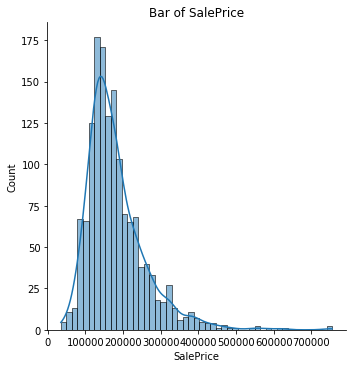

In [6]:
# SalePriceの分布をみる。
sns.displot(data = df, x = 'SalePrice',kde=True)
plt.title("Bar of SalePrice")
plt.show()

SalesPriceの一番多いのはUSD150,000辺り。

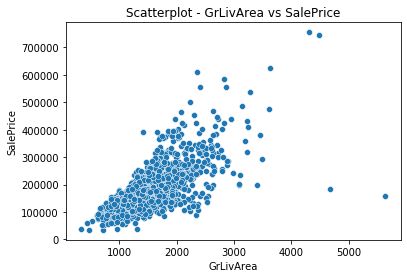

In [7]:
# SalePriceとGrLivAreaの関係をみる。
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice')
plt.title("Scatterplot - GrLivArea vs SalePrice")
plt.show()

GrLivAreaの値が大きいほど、SalesPriceの値も大きくなるよう。

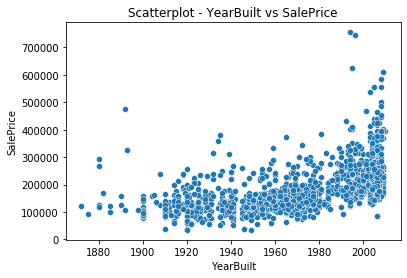

In [8]:
# SalePriceとYearBuiltの関係をみる。
sns.scatterplot(data=df, x='YearBuilt', y='SalePrice')
plt.title("Scatterplot - YearBuilt vs SalePrice")
plt.show()

YearBuiltの値が大きいほど、SalesProceの値も比較的大きくなるよう。

### 前処理

In [9]:
#SalePriceをLogで正規分布に近い形へ変更する。
#df['SalePrice_log'] = np.log(df['SalePrice'])
#sns.displot(data = df, x = 'SalePrice_log',kde=True)

In [10]:
display(df)

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


### 学習と推定

In [11]:
# DataFrameをndarrayへ変換する。
df = df.to_numpy()
print(df)

[[  1710   2003 208500]
 [  1262   1976 181500]
 [  1786   2001 223500]
 ...
 [  2340   1941 266500]
 [  1078   1950 142125]
 [  1256   1965 147500]]


In [12]:
# 特徴量（説明変数）をX、正解（目的変数）をyに格納する。
X = df[:,:2]
y = df[:,2]

In [13]:
#XとyのShapeを確認する。
print("X:{}".format(X.shape))
print("y:{}".format(y.shape))
print("")

#trains_test_splitを利用してXとyをTrain:Test=75%:25%の割合で分割する。
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75,random_state=1)

#分割結果を確認する。
print("X_train:{}".format(X_train.shape))
print("X_test:{}".format(X_test.shape))
print("y_train:{}".format(y_train.shape))
print("y_test:{}".format(y_test.shape))

X:(1460, 2)
y:(1460,)

X_train:(1095, 2)
X_test:(365, 2)
y_train:(1095,)
y_test:(365,)


In [14]:
# sklearnからLinearRegressionをインポートする
from sklearn import linear_model

# モデルに引数をつけインスタンス化する。
lr = linear_model.LinearRegression()

# 学習する（訓練用データを.fitする）
lr.fit(X_train, y_train)

# 推定する（検証用データを.predictする）
y_pred = lr.predict(X_test)

# skleranからMSEをインポートする。
from sklearn.metrics import mean_squared_error
print("評価:{}".format(mean_squared_error(y_test, y_pred)))

評価:1886785549.9599512


### 可視化

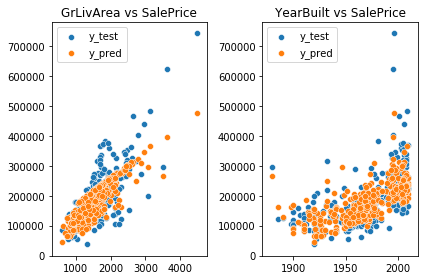

In [15]:
# 散布図
plt.subplot(1,2,1)
sns.scatterplot(x = X_test[:,0],y=y_test[:],label="y_test")
sns.scatterplot(x = X_test[:,0],y=y_pred[:],label="y_pred")
plt.title("GrLivArea vs SalePrice")
plt.legend()

plt.subplot(1,2,2)
sns.scatterplot(x = X_test[:,1],y=y_test[:],label="y_test")
sns.scatterplot(x = X_test[:,1],y=y_pred[:],label="y_pred")
plt.title("YearBuilt vs SalePrice")
plt.legend()

plt.tight_layout()

plt.show()



同じような散布結果になった。

## 【問題3】手法の比較
以下のすべての手法について学習・推定・評価・可視化を行ってください。\
そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。\
どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

・線形回帰\
・SVM\
・決定木\
・ランダムフォレスト

公式ドキュメントへのリンクは以下です。\
本来はパラメータチューニングを行いますが、まずはデフォルトの値で実行しましょう。

・sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation\
・sklearn.svm.SVR — scikit-learn 0.21.3 documentation\
・sklearn.tree.DecisionTreeRegressor — scikit-learn 0.21.3 documentation\
・sklearn.ensemble.RandomForestRegressor — scikit-learn 0.21.3 documentation

SVM、決定木、ランダムフォレストは分類問題でも使用した手法ですが、回帰問題用のライブラリはそれぞれ専用のものに分かれています。

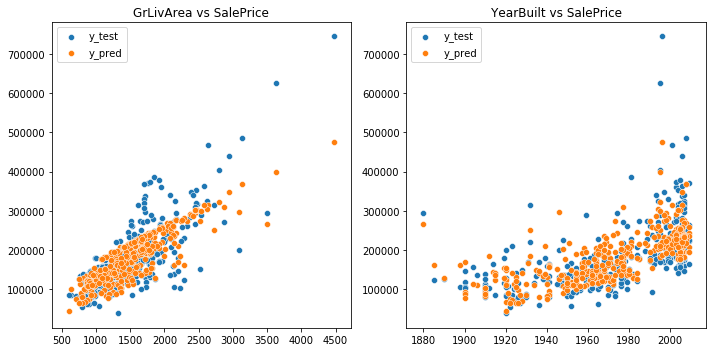

LinearRegression   評価:1886785549.9599512


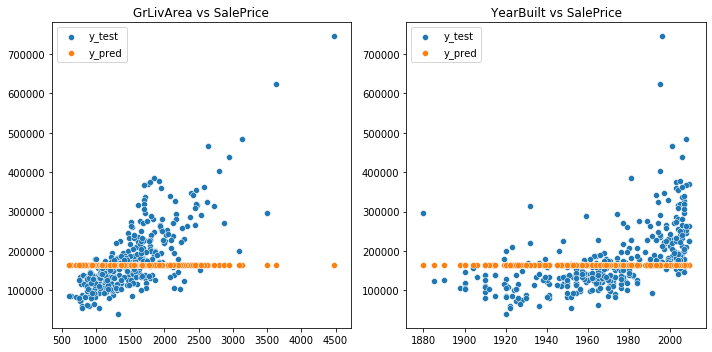

SVR   評価:6839775542.979045


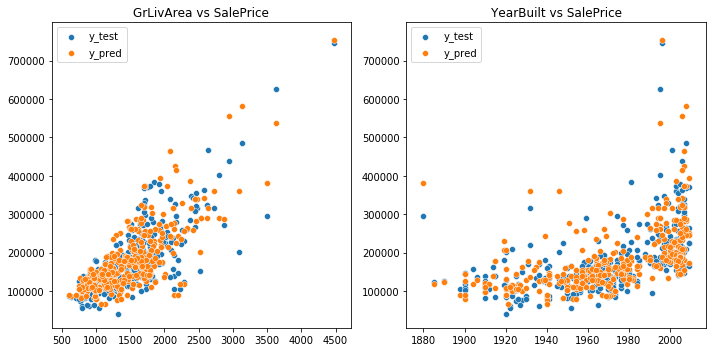

DecisionTreeRegressor   評価:2556511840.554947


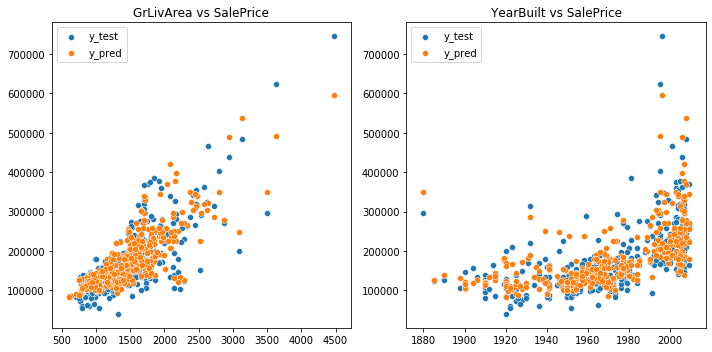

RandomForestRegressor   評価:1717769499.1922257


In [16]:
# sklearnのから各種モデルをimportする
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# importしたモデルをインスタンス化
lr = LinearRegression()
svr = SVR()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()

# 可視化
models = [lr,svr,dtr,rfr]
model_names = ["LinearRegression", "SVR", "DecisionTreeRegressor", "RandomForestRegressor"]
for model, model_name in zip(models, model_names):
    print("=========================================================")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # 散布図
    plt.subplots(1, 2, figsize=(10,5))
    plt.subplot(1,2,1)
    sns.scatterplot(x = X_test[:,0],y=y_test[:],label="y_test")
    sns.scatterplot(x = X_test[:,0],y=y_pred[:],label="y_pred")
    plt.title("GrLivArea vs SalePrice")
    plt.legend()

    plt.subplot(1,2,2)
    sns.scatterplot(x = X_test[:,1],y=y_test[:],label="y_test")
    sns.scatterplot(x = X_test[:,1],y=y_pred[:],label="y_pred")
    plt.title("YearBuilt vs SalePrice")
    plt.legend()

    plt.tight_layout()

    plt.show()
    print(model_name + "   " "評価:{}".format(mean_squared_error(y_test, y_pred)))    
    print("=========================================================")

## 【問題4】（アドバンス課題）他の特徴量も使用しての学習
ここまでは練習のために2つの特徴量だけを使いましたが、他の特徴量を加えるとどのようになるか検証してください。\
どう選択・加工するかにはデータ分析が重要になってきます。

In [17]:
df = pd.read_csv('train.csv')

In [18]:
#各特徴量がどういったものかを見る。（数値データか文字データなど）
display(df.head())
display(df.info())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

None

In [19]:
# 5つ以上欠損値がある特徴量（列）は削除する。
missing = df.isnull().sum(axis=0) #各列の欠損値を合計
missing5 = missing[missing>=5] #5つ以上欠損値がある列を抽出
df.drop(missing5.index,axis=1, inplace=True) #対象列を削除

# 5つ以上欠損値がある特徴量を削除したデータから、欠損値があるサンプル（行）は削除する。
df.dropna(how='any',inplace=True)

In [20]:
#各特徴量がどういったものかを見る。（数値データか文字データなど）
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1459 non-null   int64 
 1   MSSubClass     1459 non-null   int64 
 2   MSZoning       1459 non-null   object
 3   LotArea        1459 non-null   int64 
 4   Street         1459 non-null   object
 5   LotShape       1459 non-null   object
 6   LandContour    1459 non-null   object
 7   Utilities      1459 non-null   object
 8   LotConfig      1459 non-null   object
 9   LandSlope      1459 non-null   object
 10  Neighborhood   1459 non-null   object
 11  Condition1     1459 non-null   object
 12  Condition2     1459 non-null   object
 13  BldgType       1459 non-null   object
 14  HouseStyle     1459 non-null   object
 15  OverallQual    1459 non-null   int64 
 16  OverallCond    1459 non-null   int64 
 17  YearBuilt      1459 non-null   int64 
 18  YearRemodAdd   1459 non-null

None

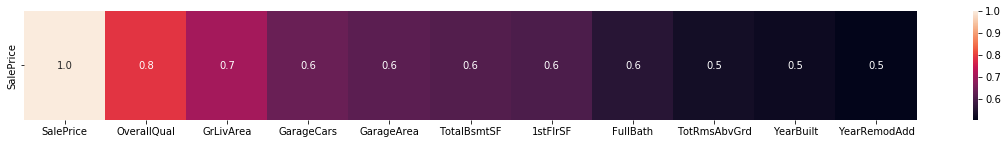

In [21]:
#目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
corrmat = df.corr()
corrmat10 = corrmat.nlargest(11, 'SalePrice')
plt.figure(figsize=(20, 2))
sns.heatmap(corrmat10[["SalePrice"]].T,annot=True,fmt="1.1f")
plt.show()

In [22]:
# DataFrameをndarrayへ変換する。
df = df.to_numpy()

In [23]:
# 特徴量（説明変数）をX、正解（目的変数）をyに格納する。
X = df[:,[15, 37, 48,49, 29, 34, 40, 45, 17, 18]]
y = df[:,62]

In [24]:
#XとyのShapeを確認する。
print("X:{}".format(X.shape))
print("y:{}".format(y.shape))
print("")

#trains_test_splitを利用してXとyをTrain:Test=75%:25%の割合で分割する。
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75,random_state=1)

#分割結果を確認する。
print("X_train:{}".format(X_train.shape))
print("X_test:{}".format(X_test.shape))
print("y_train:{}".format(y_train.shape))
print("y_test:{}".format(y_test.shape))

X:(1459, 10)
y:(1459,)

X_train:(1094, 10)
X_test:(365, 10)
y_train:(1094,)
y_test:(365,)


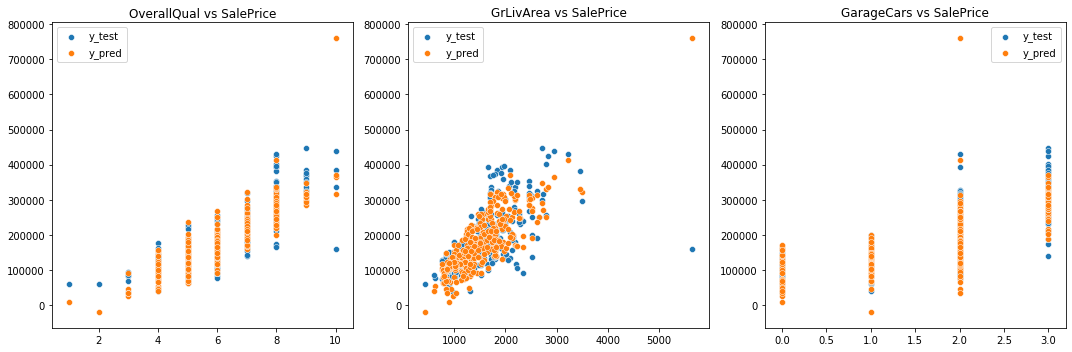

LinearRegression   評価:1896382893.3656414


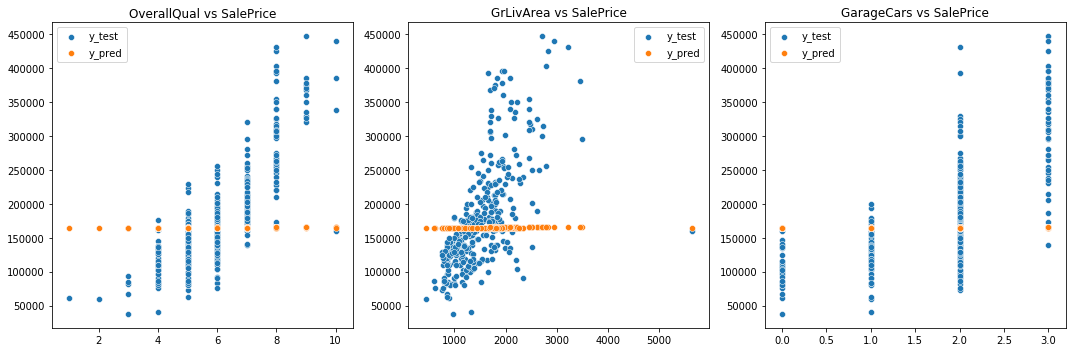

SVR   評価:6040099425.057786


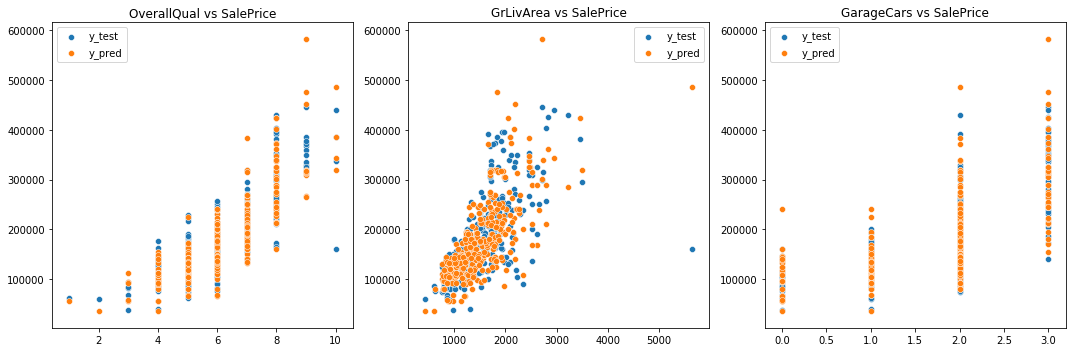

DecisionTreeRegressor   評価:1653187655.7020547


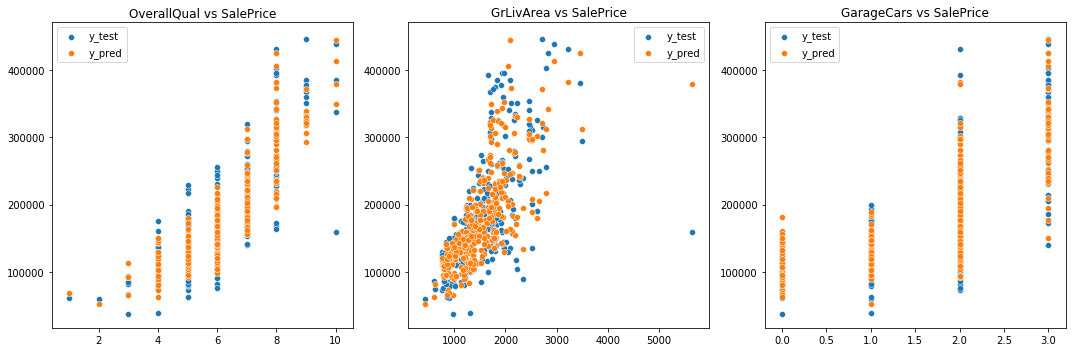

RandomForestRegressor   評価:854875327.9974773


In [25]:

# 可視化
models = [lr,svr,dtr,rfr]
model_names = ["LinearRegression", "SVR", "DecisionTreeRegressor", "RandomForestRegressor"]
for model, model_name in zip(models, model_names):
    print("=========================================================")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # 散布図
    plt.subplots(1, 3, figsize=(15,5))
    
    plt.subplot(1,3,1)
    sns.scatterplot(x = X_test[:,0],y=y_test[:],label="y_test")
    sns.scatterplot(x = X_test[:,0],y=y_pred[:],label="y_pred")
    plt.title("OverallQual vs SalePrice")
    plt.legend()

    plt.subplot(1,3,2)
    sns.scatterplot(x = X_test[:,1],y=y_test[:],label="y_test")
    sns.scatterplot(x = X_test[:,1],y=y_pred[:],label="y_pred")
    plt.title("GrLivArea vs SalePrice")
    plt.legend()
    
    plt.subplot(1,3,3)
    sns.scatterplot(x = X_test[:,2],y=y_test[:],label="y_test")
    sns.scatterplot(x = X_test[:,2],y=y_pred[:],label="y_pred")
    plt.title("GarageCars vs SalePrice")
    plt.legend()
    
    plt.tight_layout()

    plt.show()
    print(model_name + "   " "評価:{}".format(mean_squared_error(y_test, y_pred)))    
    print("=========================================================")